<a href="https://colab.research.google.com/github/rmatrella/BirdsSound/blob/main/Pretrained_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd "/content/drive/MyDrive/Marino_Matrella"
root = os.getcwd()

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project


# Init

In [ ]:
from google.colab import drive
import os
import shutil
import numpy as np
import random as rn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from keras.models import Model
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [ ]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

In [ ]:
MODEL_FOLDER = os.path.join(root, 'birds/model/MobileNet/')
MODEL_FOLDER

'/content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/'

In [ ]:
%run '/content/drive/MyDrive/CIDL project/Utilities.ipynb'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project
tensor version is  2.14.0-dev20230629


# Load sets

In [ ]:
PATH = os.path.join(root,'birds/dataset')

train_set = image_dataset_from_directory(
    os.path.join(PATH, 'train'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    labels="inferred",
    shuffle=True,
    color_mode='rgb')

test_set = image_dataset_from_directory(
    os.path.join(PATH, 'test'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    labels="inferred",
    shuffle=False,
    color_mode='rgb')

validation_set = image_dataset_from_directory(
    os.path.join(PATH, 'validation'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    labels="inferred",
    shuffle=True,
    color_mode='rgb')

Found 9959 files belonging to 100 classes.
Found 5306 files belonging to 100 classes.
Found 7983 files belonging to 100 classes.


In [ ]:
spectr_train_set = image_dataset_from_directory(  # with classical augmentation on spectrograms
    os.path.join(PATH, 'train_aug_spec'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    labels="inferred",
    shuffle=True,
    color_mode='rgb')

audio_train_set = image_dataset_from_directory(   # with audio augmentation
    os.path.join(PATH, 'train_audio_aug'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    labels="inferred",
    shuffle=True,
    color_mode='rgb')

specaug_train_set = image_dataset_from_directory(   # with SpecAug tecnique
    os.path.join(PATH, 'train_specaug'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    labels="inferred",
    shuffle=True,
    color_mode='rgb')

Found 10000 files belonging to 100 classes.
Found 10000 files belonging to 100 classes.
Found 10000 files belonging to 100 classes.


#Load model

In [ ]:
conv_base = tf.keras.applications.MobileNetV2(
    input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3),
    alpha=1,
    include_top= False,
    weights="imagenet",
)

In [ ]:
#conv_base.summary()

In [ ]:
conv_base.trainable = False

In [ ]:
#keras.utils.plot_model(conv_base, "conv_base.png")

In [ ]:
class_weights = compute_class_weights("birds/dataset/train")
class_weights

{0: 0.9959,
 1: 0.9959,
 2: 0.9959,
 3: 0.9959,
 4: 0.9959,
 5: 0.9959,
 6: 0.9959,
 7: 0.9959,
 8: 1.0483157894736843,
 9: 0.9959,
 10: 0.9959,
 11: 0.9959,
 12: 1.1065555555555555,
 13: 0.9959,
 14: 0.9959,
 15: 0.9959,
 16: 0.9959,
 17: 0.9959,
 18: 0.9959,
 19: 0.9959,
 20: 0.9959,
 21: 0.9959,
 22: 0.9959,
 23: 0.9959,
 24: 0.9959,
 25: 0.9959,
 26: 0.9959,
 27: 0.9959,
 28: 0.9959,
 29: 0.9959,
 30: 0.9959,
 31: 0.9959,
 32: 0.9959,
 33: 0.9959,
 34: 0.9959,
 35: 0.9959,
 36: 0.9959,
 37: 0.9959,
 38: 0.9959,
 39: 0.9959,
 40: 0.9959,
 41: 0.9959,
 42: 0.9959,
 43: 0.9959,
 44: 0.9959,
 45: 0.9959,
 46: 0.9959,
 47: 0.9959,
 48: 0.9959,
 49: 0.9959,
 50: 0.9959,
 51: 0.9959,
 52: 0.9959,
 53: 0.9959,
 54: 0.9959,
 55: 0.9959,
 56: 0.9959,
 57: 0.9959,
 58: 0.9959,
 59: 1.1065555555555555,
 60: 0.9959,
 61: 0.9959,
 62: 0.9959,
 63: 0.9959,
 64: 0.9959,
 65: 0.9959,
 66: 1.0483157894736843,
 67: 1.0825,
 68: 0.9959,
 69: 0.9959,
 70: 0.9959,
 71: 0.9959,
 72: 0.9959,
 73: 0.9959,


In [ ]:
IMG_SIZE = 224
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

#Feature extraction

##Augmentation experiments

###Flatten + Dense

####a.No augment

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = resize_and_rescale(inputs)
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model1 = keras.Model(inputs, outputs)

model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                             

In [ ]:
model = compile_model(model1)

In [ ]:
history = run_model(model, 'MobileNet_flatten_noAug', train_set, validation_set, MODEL_FOLDER, class_weights)

Epoch 1/50
312/312 [==============================] - ETA: 0s - loss: 5.3539 - accuracy: 0.2347 - f1_score: 0.2341
Epoch 1: val_loss improved from inf to 3.74110, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_flatten_noAug.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


312/312 [==============================] - 505s 2s/step - loss: 5.3539 - accuracy: 0.2347 - f1_score: 0.2341 - val_loss: 3.7411 - val_accuracy: 0.3803 - val_f1_score: 0.4007 - lr: 1.0000e-04
Epoch 2/50
311/312 [============================>.] - ETA: 0s - loss: 1.1637 - accuracy: 0.7239 - f1_score: 0.7241
Epoch 2: val_loss improved from 3.74110 to 3.56573, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_flatten_noAug.h5
312/312 [==============================] - 53s 169ms/step - loss: 1.1630 - accuracy: 0.7241 - f1_score: 0.7243 - val_loss: 3.5657 - val_accuracy: 0.3971 - val_f1_score: 0.4306 - lr: 1.0000e-04
Epoch 3/50
311/312 [============================>.] - ETA: 0s - loss: 0.3194 - accuracy: 0.9065 - f1_score: 0.9065
Epoch 3: val_loss did not improve from 3.56573
312/312 [==============================] - 51s 160ms/step - loss: 0.3192 - accuracy: 0.9065 - f1_score: 0.9066 - val_loss: 4.0323 - val_

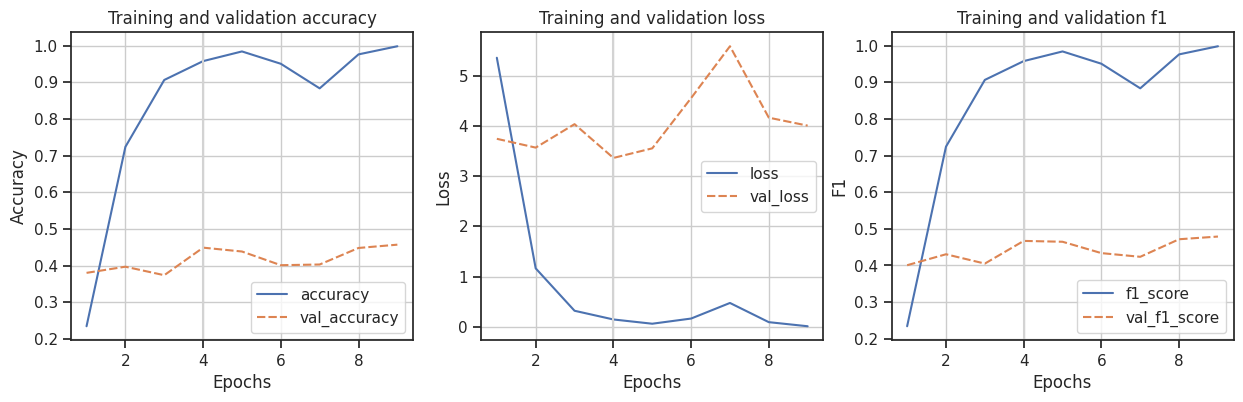

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_flatten_noAug'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_flatten_noAug.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 290s 2s/step - loss: 3.4284 - accuracy: 0.4450 - f1_score: 0.4634

Test loss: 3.428
Test accuracy: 0.445
Test f1: 0.463

Accuracy on test data: 44.50 %
F1-Score on test data: 46.34 %

              precision    recall  f1-score   support

     abhori1       0.92      0.24      0.38        50
     afecuc1       0.90      0.32      0.47        28
     afghor1       0.19      0.65      0.29        20
     afmdov1       0.55      0.40      0.46        15
     afpfly1       0.33      0.03      0.06        31
     afpwag1       0.16      0.42      0.23        24
     afrgos1       0.73      0.46      0.56        24
     afrthr1       0.87      0.43      0.58        30
     amesun2       0.17      0.08      0.11        13
      barswa       0.82      0.22      0.34       166
     bawhor2       0.40      0.53      0.46        15
     bcbeat1       0.13      0.53      0.21        17
     beasun2       0.14      0.50      0.22        12
     bkctch1    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### b.Balanced with SpecAugment

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = resize_and_rescale(inputs)
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                             

In [ ]:
model = compile_model(model)

In [ ]:
history = run_model(model, 'MobileNet_flatten_specaug', specaug_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 5.3386 - accuracy: 0.2349 - f1_score: 0.2337
Epoch 1: val_loss improved from inf to 4.94516, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_flatten_specaug.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 755s 2s/step - loss: 5.3386 - accuracy: 0.2349 - f1_score: 0.2337 - val_loss: 4.9452 - val_accuracy: 0.3308 - val_f1_score: 0.3498 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 1.1346 - accuracy: 0.7316 - f1_score: 0.7317
Epoch 2: val_loss improved from 4.94516 to 4.49274, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_flatten_specaug.h5
313/313 [==============================] - 97s 309ms/step - loss: 1.1346 - accuracy: 0.7316 - f1_score: 0.7317 - val_loss: 4.4927 - val_accuracy: 0.3282 - val_f1_score: 0.3735 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 0.3481 - accuracy: 0.9007 - f1_score: 0.9007
Epoch 3: val_loss improved from 4.49274 to 3.73769, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_flatten_specaug.h5
313/313 [==============================] - 97s 306ms/step - loss: 0.3481 - a

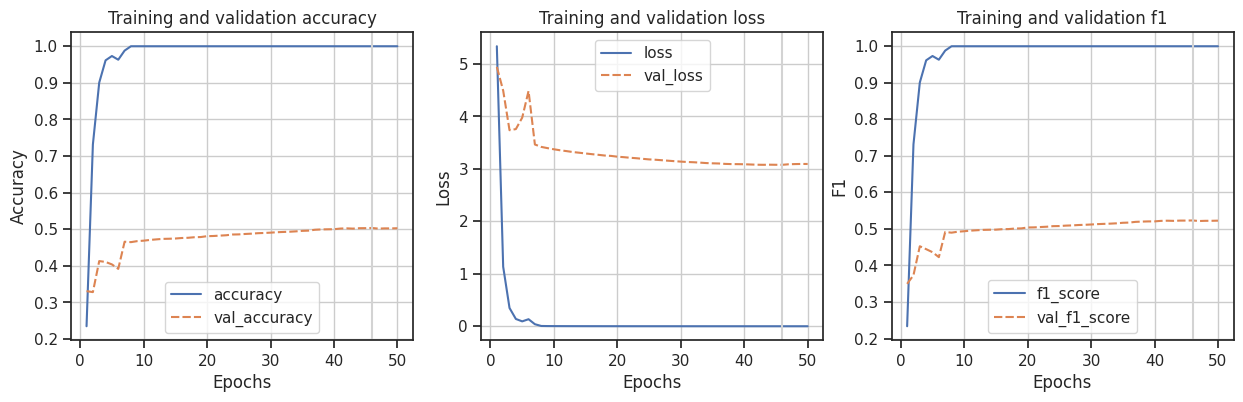

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_flatten_specaug'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_flatten_specaug.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 256s 2s/step - loss: 3.1643 - accuracy: 0.4930 - f1_score: 0.5141

Test loss: 3.164
Test accuracy: 0.493
Test f1: 0.514

Accuracy on test data: 49.30 %
F1-Score on test data: 51.41 %

              precision    recall  f1-score   support

     abhori1       0.47      0.46      0.46        50
     afecuc1       0.54      0.71      0.62        28
     afghor1       0.33      0.55      0.42        20
     afmdov1       0.28      0.80      0.41        15
     afpfly1       0.20      0.32      0.24        31
     afpwag1       0.24      0.50      0.32        24
     afrgos1       0.40      0.71      0.52        24
     afrthr1       0.46      0.60      0.52        30
     amesun2       0.04      0.15      0.06        13
      barswa       0.50      0.39      0.44       166
     bawhor2       0.26      0.60      0.37        15
     bcbeat1       0.13      0.47      0.20        17
     beasun2       0.35      0.58      0.44        12
     bkctch1    

####c.Balanced with augmentation on spectrograms

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = resize_and_rescale(inputs)
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                           

In [ ]:
model = compile_model(model)

In [ ]:
history = run_model(model, 'MobileNet_flatten_augspectr', spectr_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 5.1729 - accuracy: 0.2405 - f1_score: 0.2393
Epoch 1: val_loss improved from inf to 4.05861, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_flatten_augspectr.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1045s 3s/step - loss: 5.1729 - accuracy: 0.2405 - f1_score: 0.2393 - val_loss: 4.0586 - val_accuracy: 0.3779 - val_f1_score: 0.3978 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 1.1250 - accuracy: 0.7279 - f1_score: 0.7277
Epoch 2: val_loss did not improve from 4.05861
313/313 [==============================] - 52s 163ms/step - loss: 1.1250 - accuracy: 0.7279 - f1_score: 0.7277 - val_loss: 4.2010 - val_accuracy: 0.3565 - val_f1_score: 0.3807 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 0.3453 - accuracy: 0.9015 - f1_score: 0.9016
Epoch 3: val_loss improved from 4.05861 to 3.48788, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_flatten_augspectr.h5
313/313 [==============================] - 53s 167ms/step - loss: 0.3448 - accuracy: 0.9017 - f1_score: 0.9018 - val_loss: 3.4879 -

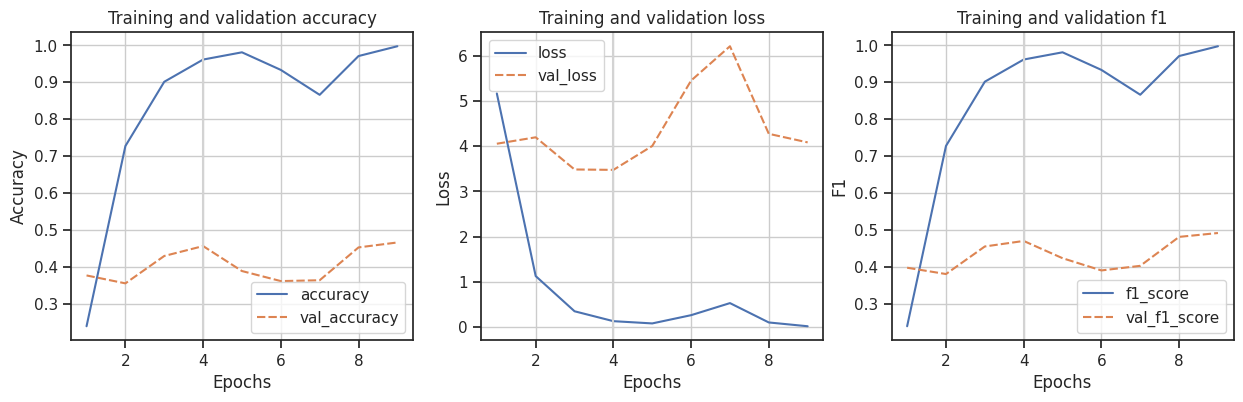

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_flatten_augspectr'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_flatten_augspectr.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 17s 92ms/step - loss: 3.5478 - accuracy: 0.4382 - f1_score: 0.4546

Test loss: 3.548
Test accuracy: 0.438
Test f1: 0.455

Accuracy on test data: 43.82 %
F1-Score on test data: 45.46 %

              precision    recall  f1-score   support

     abhori1       0.60      0.42      0.49        50
     afecuc1       0.75      0.43      0.55        28
     afghor1       0.39      0.45      0.42        20
     afmdov1       0.46      0.40      0.43        15
     afpfly1       0.19      0.13      0.15        31
     afpwag1       0.25      0.54      0.35        24
     afrgos1       0.70      0.29      0.41        24
     afrthr1       0.41      0.60      0.49        30
     amesun2       0.22      0.15      0.18        13
      barswa       0.49      0.48      0.48       166
     bawhor2       0.21      0.73      0.32        15
     bcbeat1       0.25      0.18      0.21        17
     beasun2       0.67      0.33      0.44        12
     bkctch1   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####d.Balanced with augmentation on audio

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = resize_and_rescale(inputs)
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_2 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_2 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                           

In [ ]:
model = compile_model(model)

In [ ]:
history = run_model(model, 'MobileNet_flatten_augaudio', audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
312/313 [============================>.] - ETA: 1s - loss: 5.1521 - accuracy: 0.2414 - f1_score: 0.2400
Epoch 1: val_loss improved from inf to 4.33764, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_flatten_augaudio.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 583s 2s/step - loss: 5.1535 - accuracy: 0.2414 - f1_score: 0.2400 - val_loss: 4.3376 - val_accuracy: 0.3688 - val_f1_score: 0.3769 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 1.1023 - accuracy: 0.7349 - f1_score: 0.7345
Epoch 2: val_loss improved from 4.33764 to 3.65964, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_flatten_augaudio.h5
313/313 [==============================] - 54s 170ms/step - loss: 1.1023 - accuracy: 0.7349 - f1_score: 0.7345 - val_loss: 3.6596 - val_accuracy: 0.3946 - val_f1_score: 0.4277 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 0.3079 - accuracy: 0.9121 - f1_score: 0.9121
Epoch 3: val_loss did not improve from 3.65964
313/313 [==============================] - 50s 158ms/step - loss: 0.3077 - accuracy: 0.9121 - f1_score: 0.9122 - val_loss: 3.7185 - v

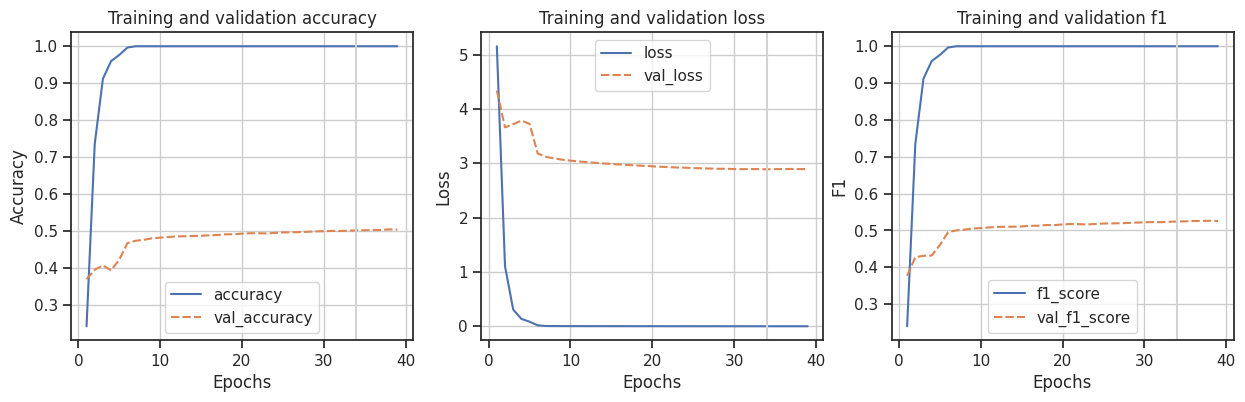

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_flatten_augaudio'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_flatten_augaudio.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 17s 89ms/step - loss: 2.9244 - accuracy: 0.4885 - f1_score: 0.5120

Test loss: 2.924
Test accuracy: 0.489
Test f1: 0.512

Accuracy on test data: 48.85 %
F1-Score on test data: 51.20 %

              precision    recall  f1-score   support

     abhori1       0.61      0.50      0.55        50
     afecuc1       0.47      0.64      0.55        28
     afghor1       0.29      0.50      0.37        20
     afmdov1       0.31      0.73      0.43        15
     afpfly1       0.24      0.32      0.27        31
     afpwag1       0.24      0.50      0.32        24
     afrgos1       0.29      0.58      0.39        24
     afrthr1       0.51      0.67      0.58        30
     amesun2       0.07      0.23      0.10        13
      barswa       0.57      0.32      0.41       166
     bawhor2       0.28      0.73      0.41        15
     bcbeat1       0.18      0.71      0.29        17
     beasun2       0.19      0.50      0.27        12
     bkctch1   

###GlobalAvgPooling + Dense

####a.Balanced with SpecAugment

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = resize_and_rescale(inputs)
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_3 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_3 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                   

In [ ]:
model = compile_model(model)

In [ ]:
history = run_model(model, 'MobileNet_gap_specaug', specaug_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.4145 - accuracy: 0.0591 - f1_score: 0.0548
Epoch 1: val_loss improved from inf to 3.92540, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_gap_specaug.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1442s 5s/step - loss: 4.4145 - accuracy: 0.0591 - f1_score: 0.0548 - val_loss: 3.9254 - val_accuracy: 0.1650 - val_f1_score: 0.1706 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 3.7160 - accuracy: 0.1818 - f1_score: 0.1635
Epoch 2: val_loss improved from 3.92540 to 3.49471, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_gap_specaug.h5
313/313 [==============================] - 94s 294ms/step - loss: 3.7159 - accuracy: 0.1816 - f1_score: 0.1633 - val_loss: 3.4947 - val_accuracy: 0.2514 - val_f1_score: 0.2576 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.3263 - accuracy: 0.2623 - f1_score: 0.2439
Epoch 3: val_loss improved from 3.49471 to 3.22979, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_gap_specaug.h5
313/313 [==============================] - 93s 293ms/step - loss: 3.3263 - accuracy

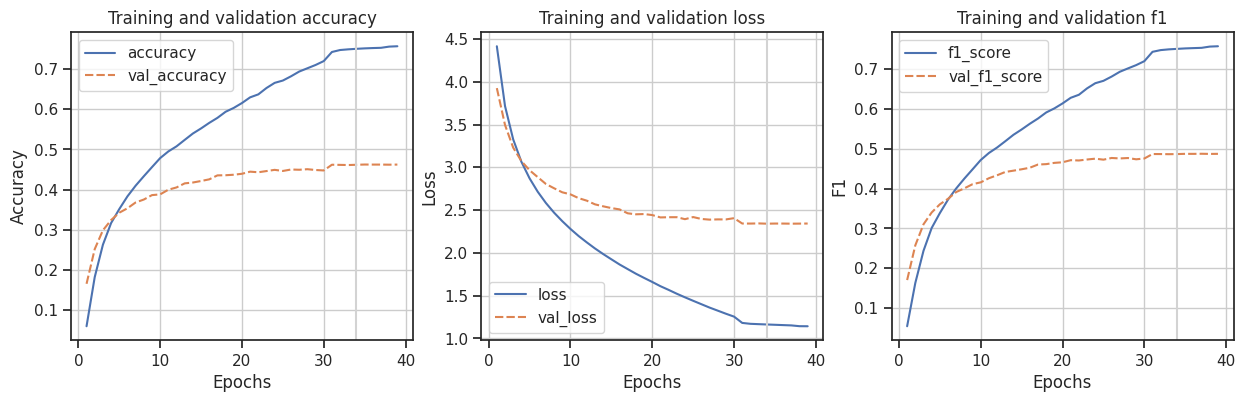

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_specaug'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_gap_specaug.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 28s 155ms/step - loss: 2.3851 - accuracy: 0.4444 - f1_score: 0.4717

Test loss: 2.385
Test accuracy: 0.444
Test f1: 0.472

Accuracy on test data: 44.44 %
F1-Score on test data: 47.17 %

              precision    recall  f1-score   support

     abhori1       0.46      0.42      0.44        50
     afecuc1       0.47      0.57      0.52        28
     afghor1       0.32      0.50      0.39        20
     afmdov1       0.12      0.40      0.19        15
     afpfly1       0.11      0.19      0.14        31
     afpwag1       0.24      0.42      0.31        24
     afrgos1       0.37      0.62      0.46        24
     afrthr1       0.45      0.60      0.51        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.55      0.27      0.36       166
     bawhor2       0.28      0.47      0.35        15
     bcbeat1       0.10      0.47      0.16        17
     beasun2       0.08      0.33      0.13        12
     bkctch1  

####b.Balanced with audio augmentation

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = resize_and_rescale(inputs)
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                     

In [ ]:
model = compile_model(model)

In [ ]:
history = run_model(model, 'MobileNet_gap_audio', audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.4095 - accuracy: 0.0603 - f1_score: 0.0564
Epoch 1: val_loss improved from inf to 3.93063, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_audio.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1425s 4s/step - loss: 4.4095 - accuracy: 0.0603 - f1_score: 0.0564 - val_loss: 3.9306 - val_accuracy: 0.1516 - val_f1_score: 0.1647 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 3.7162 - accuracy: 0.1854 - f1_score: 0.1666
Epoch 2: val_loss improved from 3.93063 to 3.49955, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_audio.h5
313/313 [==============================] - 91s 288ms/step - loss: 3.7162 - accuracy: 0.1854 - f1_score: 0.1666 - val_loss: 3.4995 - val_accuracy: 0.2415 - val_f1_score: 0.2556 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 3.3255 - accuracy: 0.2611 - f1_score: 0.2437
Epoch 3: val_loss improved from 3.49955 to 3.22585, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_

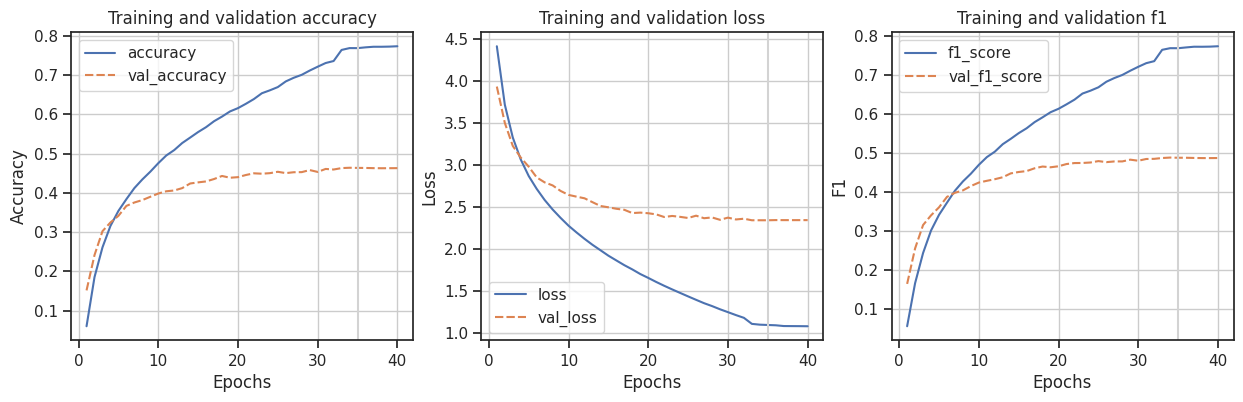

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_audio'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_gap_audio.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 30s 171ms/step - loss: 2.3869 - accuracy: 0.4452 - f1_score: 0.4711

Test loss: 2.387
Test accuracy: 0.445
Test f1: 0.471

Accuracy on test data: 44.52 %
F1-Score on test data: 47.11 %

              precision    recall  f1-score   support

     abhori1       0.47      0.44      0.45        50
     afecuc1       0.52      0.57      0.54        28
     afghor1       0.32      0.50      0.39        20
     afmdov1       0.21      0.53      0.30        15
     afpfly1       0.13      0.19      0.16        31
     afpwag1       0.25      0.38      0.30        24
     afrgos1       0.41      0.71      0.52        24
     afrthr1       0.45      0.57      0.50        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.56      0.24      0.34       166
     bawhor2       0.26      0.53      0.35        15
     bcbeat1       0.11      0.53      0.18        17
     beasun2       0.10      0.42      0.16        12
     bkctch1  

##Hyperparameters tuning

###RMSprop optizimer

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = resize_and_rescale(inputs)
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                 

In [ ]:
model = compile_model(model, optimizer="rmsprop")

In [ ]:
history = run_model(model, 'MobileNet_gap_rmsprop', audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.4061 - accuracy: 0.0646 - f1_score: 0.0619
Epoch 1: val_loss improved from inf to 3.99739, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_rmsprop.h5
313/313 [==============================] - 101s 304ms/step - loss: 4.4061 - accuracy: 0.0646 - f1_score: 0.0619 - val_loss: 3.9974 - val_accuracy: 0.1310 - val_f1_score: 0.1415 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 3.7362 - accuracy: 0.1813 - f1_score: 0.1652
Epoch 2: val_loss improved from 3.99739 to 3.60061, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_rmsprop.h5
313/313 [==============================] - 91s 287ms/step - loss: 3.7362 - accuracy: 0.1813 - f1_score: 0.1652 - val_loss: 3.6006 - val_accuracy: 0.2172 - val_f1_score: 0.2369 - 

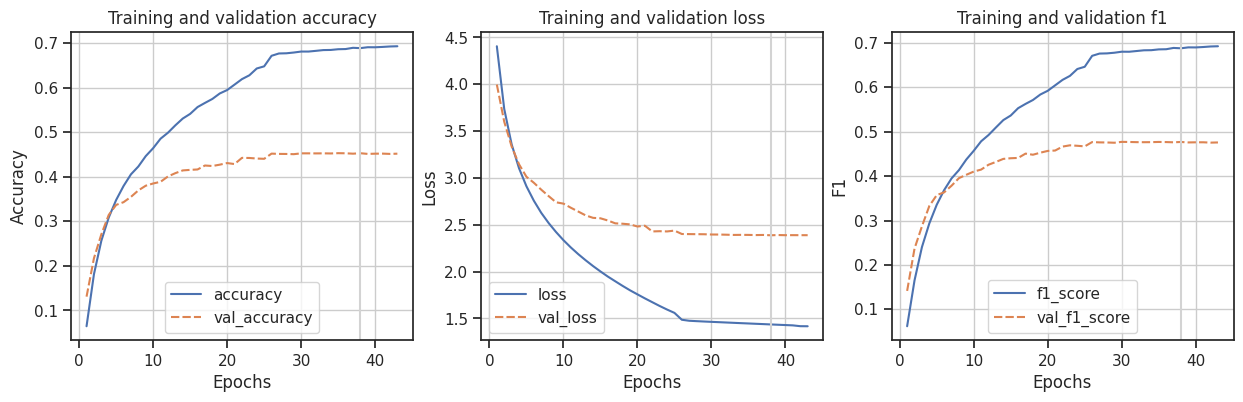

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_rmsprop'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_gap_rmsprop.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 27s 155ms/step - loss: 2.4233 - accuracy: 0.4346 - f1_score: 0.4630

Test loss: 2.423
Test accuracy: 0.435
Test f1: 0.463

Accuracy on test data: 43.46 %
F1-Score on test data: 46.30 %

              precision    recall  f1-score   support

     abhori1       0.46      0.42      0.44        50
     afecuc1       0.44      0.57      0.50        28
     afghor1       0.30      0.50      0.38        20
     afmdov1       0.18      0.53      0.27        15
     afpfly1       0.11      0.13      0.12        31
     afpwag1       0.24      0.38      0.29        24
     afrgos1       0.32      0.62      0.42        24
     afrthr1       0.55      0.57      0.56        30
     amesun2       0.02      0.08      0.03        13
      barswa       0.59      0.27      0.37       166
     bawhor2       0.14      0.33      0.20        15
     bcbeat1       0.05      0.18      0.08        17
     beasun2       0.09      0.42      0.14        12
     bkctch1  

###SGD optimizer

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = resize_and_rescale(inputs)
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_2 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_2 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                 

In [ ]:
model = compile_model(model, optimizer="sgd")

In [ ]:
history = run_model(model, 'MobileNet_gap_sgd', audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
312/313 [============================>.] - ETA: 0s - loss: 4.8635 - accuracy: 0.0118 - f1_score: 0.0091
Epoch 1: val_loss improved from inf to 4.70670, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_sgd.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 95s 288ms/step - loss: 4.8637 - accuracy: 0.0118 - f1_score: 0.0090 - val_loss: 4.7067 - val_accuracy: 0.0137 - val_f1_score: 0.0137 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 4.6204 - accuracy: 0.0240 - f1_score: 0.0217
Epoch 2: val_loss improved from 4.70670 to 4.56990, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_sgd.h5
313/313 [==============================] - 91s 289ms/step - loss: 4.6201 - accuracy: 0.0241 - f1_score: 0.0218 - val_loss: 4.5699 - val_accuracy: 0.0230 - val_f1_score: 0.0234 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 4.4844 - accuracy: 0.0370 - f1_score: 0.0326
Epoch 3: val_loss improved from 4.56990 to 4.45183, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_g

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-69b2080fa12f>", line 1, in <cell line: 1>
    history = run_model(model, 'MobileNet_gap_sgd', audio_train_set, validation_set, MODEL_FOLDER)
  File "<ipython-input-3-bb560af3b74b>", line 71, in run_model
    history = model.fit(train_dataset,
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.NotFoundError: Graph execution error:

Detected at node ReadFile defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_sgd'), axis=0)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-a561748ff6bd>", line 1, in <cell line: 1>
    plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_sgd'), axis=0)
  File "<ipython-input-3-bb560af3b74b>", line 93, in plot_model_performance
    history = pd.read_csv(path + '_history.csv')
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFi

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_gap_sgd.h5")
evaluate_model(loaded_model)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-cc57ac77d869>", line 1, in <cell line: 1>
    loaded_model = load_model(MODEL_FOLDER + "/MobileNet_gap_sgd.h5")
  File "/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_api.py", line 262, in load_model
    return legacy_sm_saving_lib.load_model(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/keras/src/saving/legacy/save.py", line 234, in load_model
    raise IOError(
OSError: No file or directory found at /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet//MobileNet_gap_sgd.h5

During handling of the above exception, another exception occu

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-cc57ac77d869>", line 1, in <cell line: 1>
    loaded_model = load_model(MODEL_FOLDER + "/MobileNet_gap_sgd.h5")
  File "/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_api.py", line 262, in load_model
    return legacy_sm_saving_lib.load_model(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/keras/src/saving/legacy/save.py", line 234, in load_model
    raise IOError(
OSError: No file or directory found at /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet//MobileNet_gap_sgd.h5

During handling of the above exception, another exception occu

### Learning rate 0.5e-4

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = resize_and_rescale(inputs)
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_3 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_3 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                 

In [ ]:
model = compile_model(model, learning_rate=0.000005)

In [ ]:
history = run_model(model, 'MobileNet_gap_lr05', audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 5.0830 - accuracy: 0.0108 - f1_score: 0.0057
Epoch 1: val_loss improved from inf to 5.22862, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_lr05.h5
313/313 [==============================] - 93s 284ms/step - loss: 5.0830 - accuracy: 0.0108 - f1_score: 0.0057 - val_loss: 5.2286 - val_accuracy: 0.0081 - val_f1_score: 0.0054 - lr: 5.0000e-06
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 4.8375 - accuracy: 0.0125 - f1_score: 0.0088
Epoch 2: val_loss improved from 5.22862 to 4.99027, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_lr05.h5
313/313 [==============================] - 92s 292ms/step - loss: 4.8370 - accuracy: 0.0125 - f1_score: 0.0088 - val_loss: 4.9903 - val_accuracy: 0.0099 - val_f1_score: 0.0074 - lr: 5.0

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-5b764227ea3c>", line 1, in <cell line: 1>
    history = run_model(model, 'MobileNet_gap_lr05', audio_train_set, validation_set, MODEL_FOLDER)
  File "<ipython-input-3-bb560af3b74b>", line 71, in run_model
    history = model.fit(train_dataset,
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1790, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorp

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_lr05'), axis=0)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-ac238d2ac3c8>", line 1, in <cell line: 1>
    plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_lr05'), axis=0)
  File "<ipython-input-3-bb560af3b74b>", line 93, in plot_model_performance
    history = pd.read_csv(path + '_history.csv')
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextF

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_gap_lr05.h5")
evaluate_model(loaded_model)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-527e59e4af90>", line 2, in <cell line: 2>
    evaluate_model(loaded_model)
  File "<ipython-input-3-bb560af3b74b>", line 140, in evaluate_model
    y_true = tf.concat([labels_batch for data_batch, labels_batch in test_set], axis = 0)
  File "<ipython-input-3-bb560af3b74b>", line 140, in <listcomp>
    y_true = tf.concat([labels_batch for data_batch, labels_batch in test_set], axis = 0)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 809, in __next__
    return self._next_internal()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 772, in _next_internal
    ret = gen_dataset_ops.iterator_get_next(
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/gen_da

### Learning rate 2e-4

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = resize_and_rescale(inputs)
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_4 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_4 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_4  (None, 1280)              0         
  (GlobalAveragePooling2D)                                 

In [ ]:
model = compile_model(model, learning_rate=0.00002)

In [ ]:
history = run_model(model, 'MobileNet_gap_lr05', audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-5b764227ea3c>", line 1, in <cell line: 1>
    history = run_model(model, 'MobileNet_gap_lr05', audio_train_set, validation_set, MODEL_FOLDER)
  File "<ipython-input-3-bb560af3b74b>", line 71, in run_model
    history = model.fit(train_dataset,
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1790, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorp

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_lr05'), axis=0)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-ac238d2ac3c8>", line 1, in <cell line: 1>
    plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_lr05'), axis=0)
  File "<ipython-input-3-bb560af3b74b>", line 93, in plot_model_performance
    history = pd.read_csv(path + '_history.csv')
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextF

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_gap_lr05.h5")
evaluate_model(loaded_model)

##Complexity experiments

###Model 1 - GlobalAvgPool + Dense (256) + Dropout

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                     

In [ ]:
model = compile_model(model)

In [ ]:
history = run_model(model, 'MobileNet_gap_dense_dropout', audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.7960 - accuracy: 0.0250 - f1_score: 0.0243
Epoch 1: val_loss improved from inf to 4.08294, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_dense_dropout.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1986s 6s/step - loss: 4.7960 - accuracy: 0.0250 - f1_score: 0.0243 - val_loss: 4.0829 - val_accuracy: 0.1225 - val_f1_score: 0.1307 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 4.1749 - accuracy: 0.0897 - f1_score: 0.0829
Epoch 2: val_loss improved from 4.08294 to 3.72913, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_dense_dropout.h5
313/313 [==============================] - 92s 290ms/step - loss: 4.1749 - accuracy: 0.0897 - f1_score: 0.0829 - val_loss: 3.7291 - val_accuracy: 0.2048 - val_f1_score: 0.2093 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 3.8168 - accuracy: 0.1497 - f1_score: 0.1382
Epoch 3: val_loss improved from 3.72913 to 3.45548, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/Mo

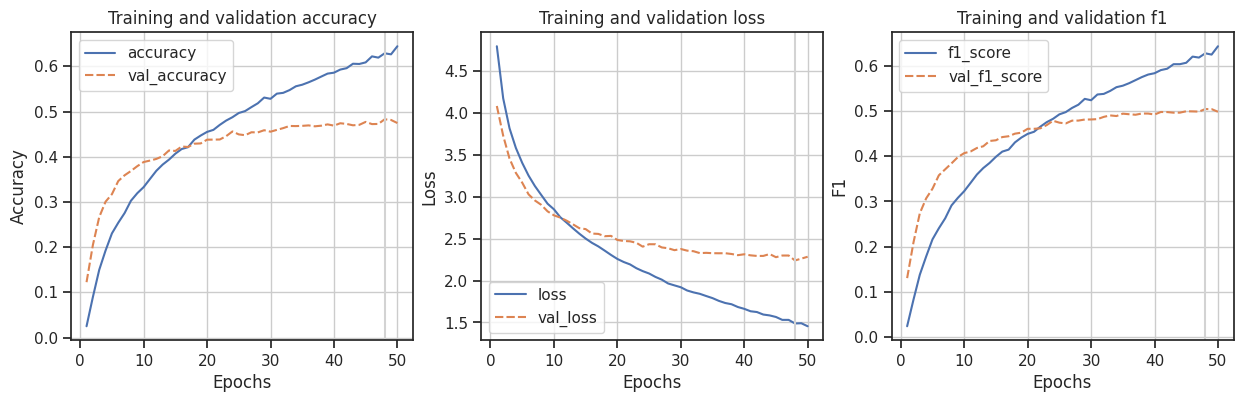

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_dense_dropout'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "MobileNet_gap_dense_dropout.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 28s 156ms/step - loss: 2.2755 - accuracy: 0.4710 - f1_score: 0.4938

Test loss: 2.275
Test accuracy: 0.471
Test f1: 0.494

Accuracy on test data: 47.10 %
F1-Score on test data: 49.38 %

              precision    recall  f1-score   support

     abhori1       0.48      0.52      0.50        50
     afecuc1       0.59      0.61      0.60        28
     afghor1       0.33      0.55      0.42        20
     afmdov1       0.21      0.40      0.28        15
     afpfly1       0.15      0.26      0.19        31
     afpwag1       0.24      0.46      0.31        24
     afrgos1       0.40      0.71      0.51        24
     afrthr1       0.55      0.60      0.57        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.50      0.32      0.39       166
     bawhor2       0.35      0.47      0.40        15
     bcbeat1       0.13      0.47      0.21        17
     beasun2       0.21      0.50      0.30        12
     bkctch1  

### Model 2 - GlobalAvgPool + Dense (256, relu) [X]

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(100, activation="softmax")(x)
model3 = keras.Model(inputs, outputs)

model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                     

In [ ]:
model = compile_model(model3)

In [ ]:
history = run_model(model, 'MobileNet_gap_dense_relu', audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.4795 - accuracy: 0.0388 - f1_score: 0.0357
Epoch 1: val_loss improved from inf to 4.16213, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_gap_dense_relu_drop.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 393s 1s/step - loss: 4.4795 - accuracy: 0.0388 - f1_score: 0.0357 - val_loss: 4.1621 - val_accuracy: 0.1065 - val_f1_score: 0.1110 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 3.9138 - accuracy: 0.1554 - f1_score: 0.1373
Epoch 2: val_loss improved from 4.16213 to 3.65662, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_gap_dense_relu_drop.h5
313/313 [==============================] - 98s 307ms/step - loss: 3.9138 - accuracy: 0.1554 - f1_score: 0.1373 - val_loss: 3.6566 - val_accuracy: 0.2148 - val_f1_score: 0.2266 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 3.4700 - accuracy: 0.2395 - f1_score: 0.2189
Epoch 3: val_loss improved from 3.65662 to 3.34003, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_gap_dense_relu_drop.h5
313/313 [==============================] - 98s 310ms/step - loss: 3.

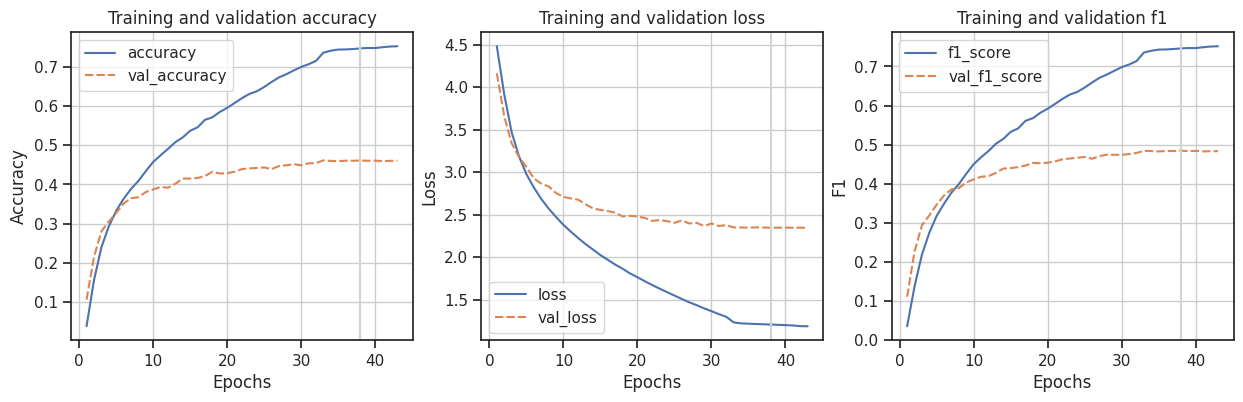

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_dense_relu'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_gap_dense_relu.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 29s 159ms/step - loss: 3.1924 - accuracy: 0.3117 - f1_score: 0.3256

Test loss: 3.192
Test accuracy: 0.312
Test f1: 0.326

Accuracy on test data: 31.17 %
F1-Score on test data: 32.56 %

              precision    recall  f1-score   support

     abhori1       0.23      0.36      0.28        50
     afecuc1       0.28      0.39      0.33        28
     afghor1       0.29      0.45      0.35        20
     afmdov1       0.07      0.40      0.11        15
     afpfly1       0.06      0.10      0.08        31
     afpwag1       0.16      0.21      0.18        24
     afrgos1       0.12      0.67      0.21        24
     afrthr1       0.33      0.50      0.40        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.40      0.13      0.19       166
     bawhor2       0.08      0.20      0.11        15
     bcbeat1       0.20      0.06      0.09        17
     beasun2       0.06      0.17      0.09        12
     bkctch1  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Model 3 - GlobalAvgPool + Dense (256, relu) + Dropout [V]

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_2 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_2 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                   

In [ ]:
model = compile_model(model)

In [ ]:
history = run_model(model, 'MobileNet_gap_dense_relu_drop', audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.6302 - accuracy: 0.0210 - f1_score: 0.0195
Epoch 1: val_loss improved from inf to 4.46516, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_dense_relu.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1710s 5s/step - loss: 4.6302 - accuracy: 0.0210 - f1_score: 0.0195 - val_loss: 4.4652 - val_accuracy: 0.0474 - val_f1_score: 0.0375 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 4.3773 - accuracy: 0.0526 - f1_score: 0.0446
Epoch 2: val_loss improved from 4.46516 to 4.19269, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_dense_relu.h5
313/313 [==============================] - 91s 287ms/step - loss: 4.3773 - accuracy: 0.0526 - f1_score: 0.0446 - val_loss: 4.1927 - val_accuracy: 0.1127 - val_f1_score: 0.1133 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 4.1505 - accuracy: 0.0909 - f1_score: 0.0808
Epoch 3: val_loss improved from 4.19269 to 3.91425, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/Mobil

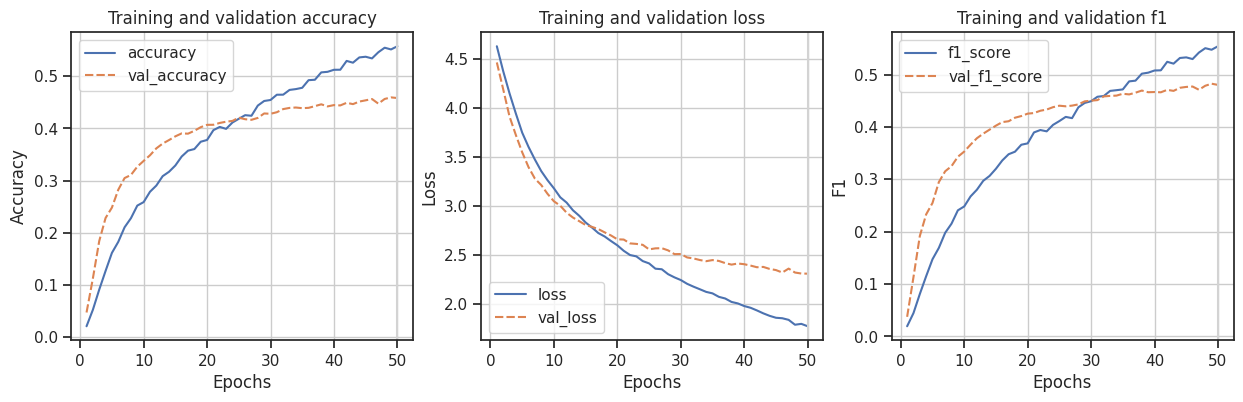

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_dense_relu_drop'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "MobileNet_gap_dense_relu_drop.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 30s 169ms/step - loss: 2.3391 - accuracy: 0.4591 - f1_score: 0.4822

Test loss: 2.339
Test accuracy: 0.459
Test f1: 0.482

Accuracy on test data: 45.91 %
F1-Score on test data: 48.22 %

              precision    recall  f1-score   support

     abhori1       0.48      0.52      0.50        50
     afecuc1       0.47      0.61      0.53        28
     afghor1       0.29      0.50      0.37        20
     afmdov1       0.19      0.60      0.29        15
     afpfly1       0.11      0.13      0.12        31
     afpwag1       0.26      0.42      0.32        24
     afrgos1       0.30      0.62      0.41        24
     afrthr1       0.57      0.53      0.55        30
     amesun2       0.03      0.08      0.05        13
      barswa       0.53      0.28      0.37       166
     bawhor2       0.26      0.40      0.32        15
     bcbeat1       0.08      0.24      0.12        17
     beasun2       0.18      0.42      0.25        12
     bkctch1  

###Model 3b - GlobalAvgPool + Dense (512, relu) + Dropout [X]

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                     

In [ ]:
model = compile_model(model)

In [ ]:
history = run_model(model, 'MobileNet_gap_dense512_relu_drop', audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.5989 - accuracy: 0.0276 - f1_score: 0.0255
Epoch 1: val_loss improved from inf to 4.28548, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_gap_dense512_relu_drop.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1218s 4s/step - loss: 4.5989 - accuracy: 0.0276 - f1_score: 0.0255 - val_loss: 4.2855 - val_accuracy: 0.1030 - val_f1_score: 0.1090 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 4.1767 - accuracy: 0.0881 - f1_score: 0.0795
Epoch 2: val_loss improved from 4.28548 to 3.89109, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_gap_dense512_relu_drop.h5
313/313 [==============================] - 99s 313ms/step - loss: 4.1767 - accuracy: 0.0881 - f1_score: 0.0795 - val_loss: 3.8911 - val_accuracy: 0.1876 - val_f1_score: 0.1961 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 3.8439 - accuracy: 0.1423 - f1_score: 0.1320
Epoch 3: val_loss improved from 3.89109 to 3.56699, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_gap_dense512_relu_drop.h5
313/313 [==============================] - 94s 298ms/step - l

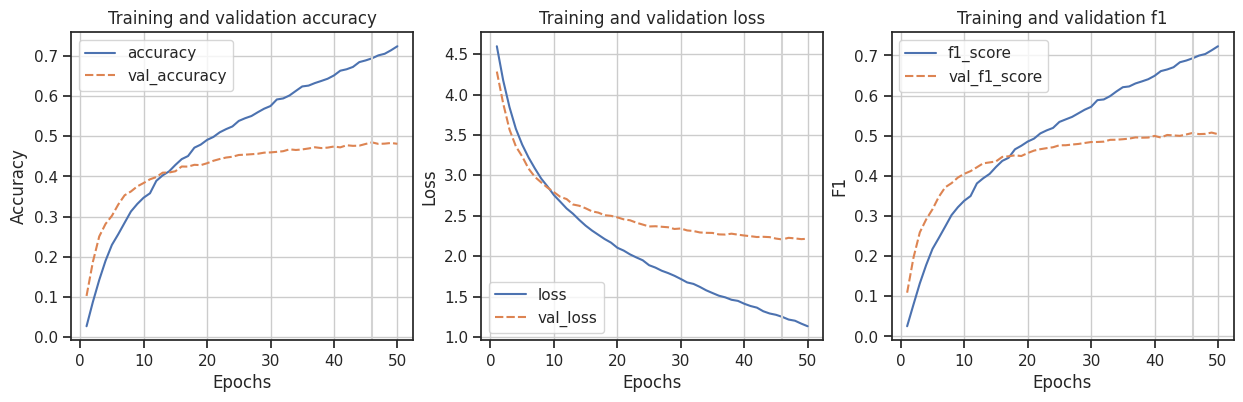

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_dense512_relu_drop'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "MobileNet_gap_dense512_relu_drop.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 27s 155ms/step - loss: 2.2378 - accuracy: 0.4764 - f1_score: 0.4996

Test loss: 2.238
Test accuracy: 0.476
Test f1: 0.500

Accuracy on test data: 47.64 %
F1-Score on test data: 49.96 %

              precision    recall  f1-score   support

     abhori1       0.46      0.46      0.46        50
     afecuc1       0.46      0.64      0.54        28
     afghor1       0.31      0.55      0.40        20
     afmdov1       0.23      0.47      0.30        15
     afpfly1       0.16      0.26      0.20        31
     afpwag1       0.32      0.50      0.39        24
     afrgos1       0.36      0.67      0.47        24
     afrthr1       0.47      0.60      0.53        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.63      0.35      0.45       166
     bawhor2       0.28      0.60      0.38        15
     bcbeat1       0.19      0.59      0.29        17
     beasun2       0.17      0.42      0.24        12
     bkctch1  

### Model 4 - Global avg pooling + 2 Dense (512, 256, relu) + Dropout [X]

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model4 = keras.Model(inputs, outputs)

model4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                 

In [ ]:
model = compile_model(model4)

In [ ]:
history = run_model(model, 'MobileNet_gap_2dense_relu_drop', audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.5648 - accuracy: 0.0263 - f1_score: 0.0217
Epoch 1: val_loss improved from inf to 4.33933, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_gap_2dense_relu_drop.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 105s 307ms/step - loss: 4.5648 - accuracy: 0.0263 - f1_score: 0.0217 - val_loss: 4.3393 - val_accuracy: 0.0649 - val_f1_score: 0.0691 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 4.2741 - accuracy: 0.0735 - f1_score: 0.0608
Epoch 2: val_loss improved from 4.33933 to 3.98310, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_gap_2dense_relu_drop.h5
313/313 [==============================] - 98s 309ms/step - loss: 4.2744 - accuracy: 0.0736 - f1_score: 0.0609 - val_loss: 3.9831 - val_accuracy: 0.1638 - val_f1_score: 0.1776 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.9561 - accuracy: 0.1246 - f1_score: 0.1095
Epoch 3: val_loss improved from 3.98310 to 3.68516, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_gap_2dense_relu_drop.h5
313/313 [==============================] - 138s 438ms/step - lo

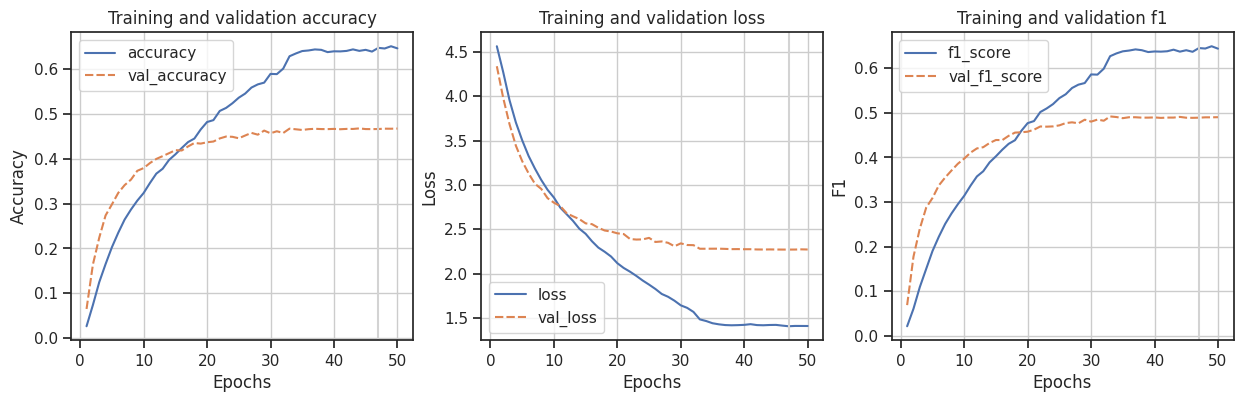

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_2dense_relu_drop'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_gap_2dense_relu_drop.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 31s 178ms/step - loss: 2.3208 - accuracy: 0.4523 - f1_score: 0.4783

Test loss: 2.321
Test accuracy: 0.452
Test f1: 0.478

Accuracy on test data: 45.23 %
F1-Score on test data: 47.83 %

              precision    recall  f1-score   support

     abhori1       0.44      0.48      0.46        50
     afecuc1       0.42      0.54      0.47        28
     afghor1       0.32      0.50      0.39        20
     afmdov1       0.18      0.53      0.27        15
     afpfly1       0.18      0.19      0.19        31
     afpwag1       0.33      0.46      0.39        24
     afrgos1       0.35      0.71      0.47        24
     afrthr1       0.55      0.70      0.62        30
     amesun2       0.05      0.15      0.07        13
      barswa       0.61      0.28      0.39       166
     bawhor2       0.26      0.67      0.38        15
     bcbeat1       0.10      0.35      0.15        17
     beasun2       0.14      0.42      0.20        12
     bkctch1  

###Model 5 - Global Average Pooling + BatchNorm + Dense (256, relu) + Dropout [X]

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                     

In [ ]:
model = compile_model(model)

In [ ]:
history = run_model(model, 'MobileNet_gap_batchnorm_dense_relu_drop', audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 5.0594 - accuracy: 0.0233 - f1_score: 0.0223
Epoch 1: val_loss improved from inf to 4.18600, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_batchnorm_dense_relu_drop.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 901s 3s/step - loss: 5.0594 - accuracy: 0.0233 - f1_score: 0.0223 - val_loss: 4.1860 - val_accuracy: 0.0988 - val_f1_score: 0.1130 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 4.3265 - accuracy: 0.0796 - f1_score: 0.0757
Epoch 2: val_loss improved from 4.18600 to 3.78215, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_batchnorm_dense_relu_drop.h5
313/313 [==============================] - 95s 299ms/step - loss: 4.3256 - accuracy: 0.0796 - f1_score: 0.0757 - val_loss: 3.7821 - val_accuracy: 0.1968 - val_f1_score: 0.2117 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.9303 - accuracy: 0.1362 - f1_score: 0.1283
Epoch 3: val_loss improved from 3.78215 to 3.50976, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/M

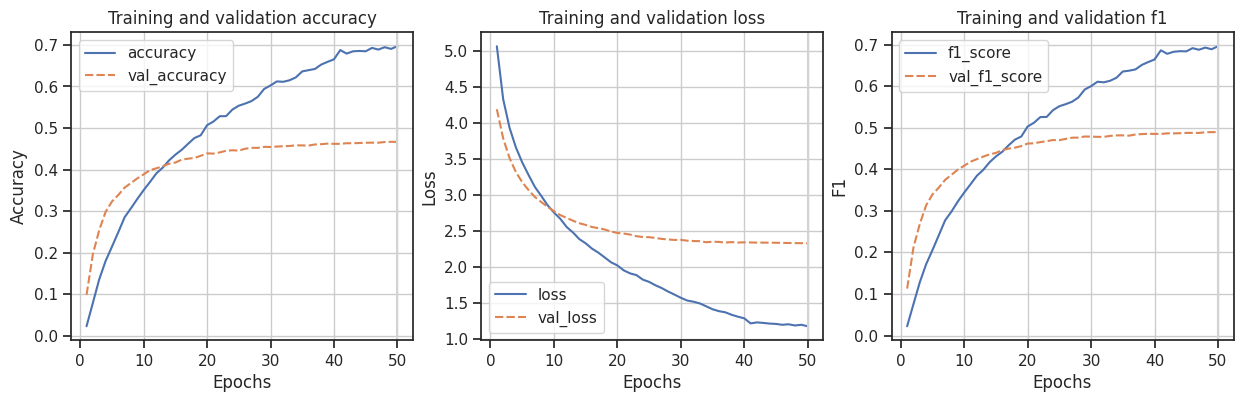

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_batchnorm_dense_relu_drop'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_gap_batchnorm_dense_relu_drop.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 30s 174ms/step - loss: 2.3651 - accuracy: 0.4557 - f1_score: 0.4817

Test loss: 2.365
Test accuracy: 0.456
Test f1: 0.482

Accuracy on test data: 45.57 %
F1-Score on test data: 48.17 %

              precision    recall  f1-score   support

     abhori1       0.50      0.48      0.49        50
     afecuc1       0.55      0.57      0.56        28
     afghor1       0.34      0.55      0.42        20
     afmdov1       0.16      0.47      0.24        15
     afpfly1       0.13      0.16      0.14        31
     afpwag1       0.29      0.50      0.36        24
     afrgos1       0.37      0.54      0.44        24
     afrthr1       0.47      0.63      0.54        30
     amesun2       0.02      0.08      0.03        13
      barswa       0.56      0.30      0.39       166
     bawhor2       0.20      0.40      0.27        15
     bcbeat1       0.17      0.71      0.27        17
     beasun2       0.13      0.42      0.20        12
     bkctch1  

###Model 6 - Global Average Pooling + BatchNorm + 2 Dense (512, 256, relu) + Dropout [X]

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.mobilenet.preprocess_input(inputs)
x = conv_base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                     

In [ ]:
model = compile_model(model)

In [ ]:
history = run_model(model, 'MobileNet_gap_batchnorm_2dense_relu_drop', audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.6369 - accuracy: 0.0302 - f1_score: 0.0271 
Epoch 1: val_loss improved from inf to 4.29850, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_batchnorm_2dense_relu_drop.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6997s 22s/step - loss: 4.6369 - accuracy: 0.0302 - f1_score: 0.0271 - val_loss: 4.2985 - val_accuracy: 0.0882 - val_f1_score: 0.0912 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 4.1174 - accuracy: 0.1043 - f1_score: 0.0943
Epoch 2: val_loss improved from 4.29850 to 3.84261, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_gap_batchnorm_2dense_relu_drop.h5
313/313 [==============================] - 136s 432ms/step - loss: 4.1172 - accuracy: 0.1044 - f1_score: 0.0945 - val_loss: 3.8426 - val_accuracy: 0.2011 - val_f1_score: 0.2191 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.7304 - accuracy: 0.1719 - f1_score: 0.1616
Epoch 3: val_loss improved from 3.84261 to 3.47817, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/mod

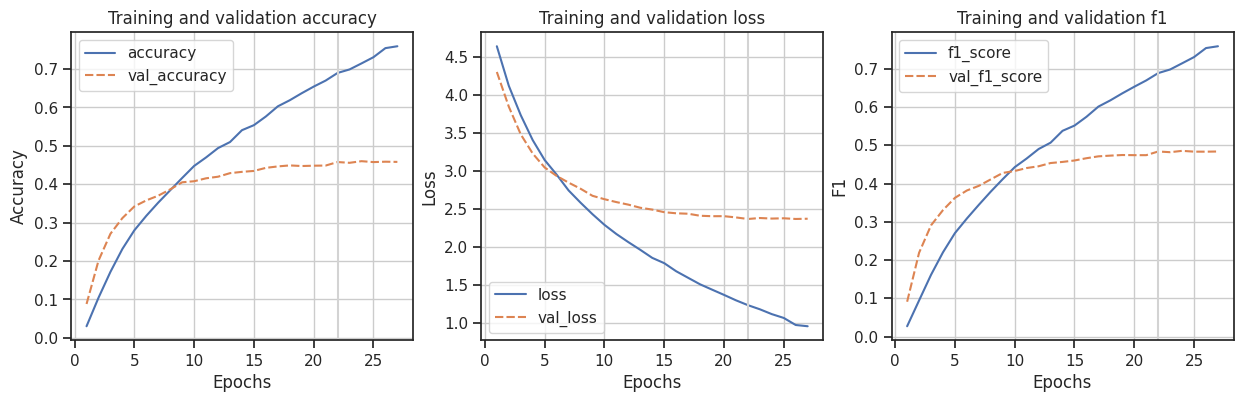

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'MobileNet_gap_batchnorm_2dense_relu_drop'), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/MobileNet_gap_batchnorm_2dense_relu_drop.h5")
evaluate_model(loaded_model)

166/166 [==============================] - 29s 163ms/step - loss: 2.3997 - accuracy: 0.4495 - f1_score: 0.4753

Test loss: 2.400
Test accuracy: 0.449
Test f1: 0.475

Accuracy on test data: 44.95 %
F1-Score on test data: 47.53 %

              precision    recall  f1-score   support

     abhori1       0.50      0.38      0.43        50
     afecuc1       0.47      0.57      0.52        28
     afghor1       0.32      0.50      0.39        20
     afmdov1       0.30      0.53      0.38        15
     afpfly1       0.15      0.23      0.18        31
     afpwag1       0.29      0.42      0.34        24
     afrgos1       0.29      0.71      0.41        24
     afrthr1       0.54      0.67      0.60        30
     amesun2       0.05      0.15      0.07        13
      barswa       0.55      0.31      0.40       166
     bawhor2       0.43      0.60      0.50        15
     bcbeat1       0.12      0.53      0.20        17
     beasun2       0.17      0.50      0.25        12
     bkctch1  

#Fine tuning

##Model 7 - model 3 block 16

In [ ]:
fine_tuning = models.load_model(os.path.join(MODEL_FOLDER, 'MobileNet_gap_dense_relu_drop.h5'))

setTrainable = False
for layer in fine_tuning.get_layer('mobilenetv2_1.00_224').layers:
    if layer.name in ('block_16_expand'):
        setTrainable = True
    if setTrainable == True:
        layer.trainable = True
    else:
      layer.trainable = False

model = compile_model(fine_tuning)

for i, layer in enumerate(fine_tuning.get_layer('mobilenetv2_1.00_224').layers):
    print(i, layer.name, layer.trainable)

name = 'MobileNet_model7'

0 input_3 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

In [ ]:
history = run_model(model, name, audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 2.6807 - accuracy: 0.3520 - f1_score: 0.3455
Epoch 1: val_loss improved from inf to 3.55719, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_model7.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2676s 8s/step - loss: 2.6807 - accuracy: 0.3520 - f1_score: 0.3455 - val_loss: 3.5572 - val_accuracy: 0.3055 - val_f1_score: 0.3292 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 2.0219 - accuracy: 0.4937 - f1_score: 0.4883
Epoch 2: val_loss improved from 3.55719 to 3.54115, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_model7.h5
313/313 [==============================] - 96s 304ms/step - loss: 2.0220 - accuracy: 0.4936 - f1_score: 0.4882 - val_loss: 3.5411 - val_accuracy: 0.3201 - val_f1_score: 0.3378 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 1.7289 - accuracy: 0.5518 - f1_score: 0.5471
Epoch 3: val_loss improved from 3.54115 to 3.52493, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_mod

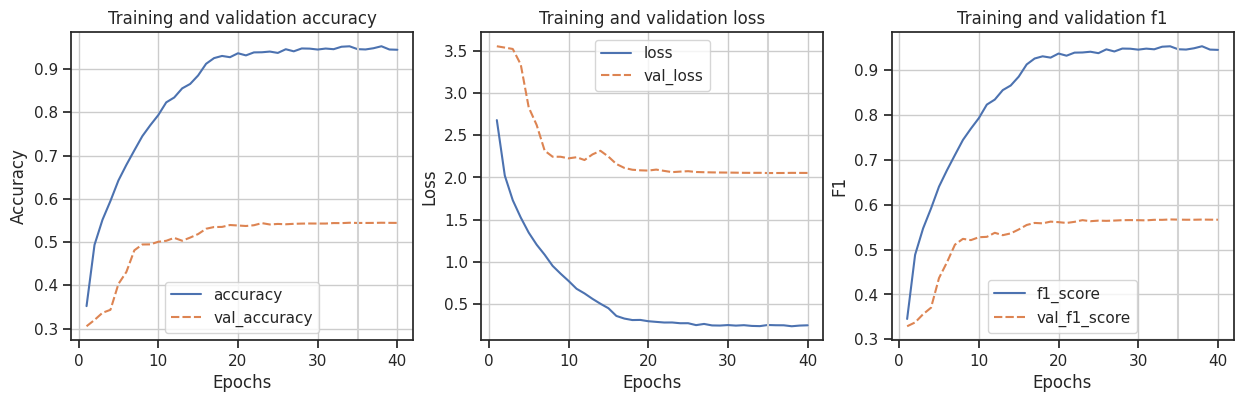

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, name), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/" + name + ".h5")
evaluate_model(loaded_model)

166/166 [==============================] - 30s 174ms/step - loss: 2.1270 - accuracy: 0.5324 - f1_score: 0.5551

Test loss: 2.127
Test accuracy: 0.532
Test f1: 0.555

Accuracy on test data: 53.24 %
F1-Score on test data: 55.51 %

              precision    recall  f1-score   support

     abhori1       0.59      0.52      0.55        50
     afecuc1       0.68      0.61      0.64        28
     afghor1       0.52      0.75      0.61        20
     afmdov1       0.40      0.67      0.50        15
     afpfly1       0.17      0.39      0.23        31
     afpwag1       0.32      0.50      0.39        24
     afrgos1       0.42      0.67      0.52        24
     afrthr1       0.54      0.70      0.61        30
     amesun2       0.04      0.15      0.07        13
      barswa       0.58      0.42      0.48       166
     bawhor2       0.31      0.60      0.41        15
     bcbeat1       0.19      0.59      0.28        17
     beasun2       0.24      0.67      0.36        12
     bkctch1  

##Model 8 - model 3 block 15,16

In [ ]:
fine_tuning = models.load_model(os.path.join(MODEL_FOLDER, 'MobileNet_gap_dense_relu_drop.h5'))

setTrainable = False
for layer in fine_tuning.get_layer('mobilenetv2_1.00_224').layers:
    if layer.name in ('block_15_expand'):
        setTrainable = True
    if setTrainable == True:
        layer.trainable = True
    else:
      layer.trainable = False

model = compile_model(fine_tuning)

for i, layer in enumerate(fine_tuning.get_layer('mobilenetv2_1.00_224').layers):
    print(i, layer.name, layer.trainable)

name = 'MobileNet_model8'

In [ ]:
history = run_model(model, name, audio_train_set, validation_set, MODEL_FOLDER)

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, name), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/" + name + ".h5")
evaluate_model(loaded_model)

##Model 9 - model 3 block 14,15,16

In [ ]:
fine_tuning = models.load_model(os.path.join(MODEL_FOLDER, 'MobileNet_gap_dense_relu_drop.h5'))

setTrainable = False
for layer in fine_tuning.get_layer('mobilenetv2_1.00_224').layers:
    if layer.name in ('block_14_expand'):
        setTrainable = True
    if setTrainable == True:
        layer.trainable = True
    else:
      layer.trainable = False

model = compile_model(fine_tuning)

for i, layer in enumerate(fine_tuning.get_layer('mobilenetv2_1.00_224').layers):
    print(i, layer.name, layer.trainable)

name = 'MobileNet_model9'

In [ ]:
history = run_model(model, name, audio_train_set, validation_set, MODEL_FOLDER)

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, name), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/" + name + ".h5")
evaluate_model(loaded_model)

#Remove block 16

In [ ]:
def get_index_by_layer_name(model, layer_name):
  '''
  get_index_by_layer_name is used to retrieve the index of a specific layer
  :param model: model to check
  :param layer_name: name of the layer we want to get the index of
  :return: the index of the layer named as defined in layer_name
  '''
  for index, layer in enumerate(model.layers):
      if layer.name == layer_name:
          return index

In [ ]:
conv_base = tf.keras.applications.MobileNetV2(
    input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3),
    alpha=1,
    include_top= False,
    weights="imagenet",
)

In [ ]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
base = Model(conv_base.input, conv_base.layers[get_index_by_layer_name(conv_base, 'block_15_add')].output, name='base')
base.trainable = False
base.summary()

Model: "base"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']         

##Feature extraction

###Model 10 - model 3

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.mobilenet.preprocess_input(inputs)
x = base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

name = 'MobileNet_model10'
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 base (Functional)           (None, 7, 7, 160)         1364864   
                                                                 
 global_average_pooling2d (  (None, 160)               0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
model = compile_model(model)

In [ ]:
history = run_model(model, name, audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.9205 - accuracy: 0.0119 - f1_score: 0.0110
Epoch 1: val_loss improved from inf to 4.54012, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_model10.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2057s 6s/step - loss: 4.9205 - accuracy: 0.0119 - f1_score: 0.0110 - val_loss: 4.5401 - val_accuracy: 0.0205 - val_f1_score: 0.0184 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 4.5432 - accuracy: 0.0245 - f1_score: 0.0229
Epoch 2: val_loss improved from 4.54012 to 4.46999, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_model10.h5
313/313 [==============================] - 95s 300ms/step - loss: 4.5432 - accuracy: 0.0245 - f1_score: 0.0229 - val_loss: 4.4700 - val_accuracy: 0.0358 - val_f1_score: 0.0287 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 4.4261 - accuracy: 0.0394 - f1_score: 0.0345
Epoch 3: val_loss improved from 4.46999 to 4.36413, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_model10.h5
313/313 [==============================] - 92s 290ms/step - loss: 4.4261 - accuracy: 0.0394

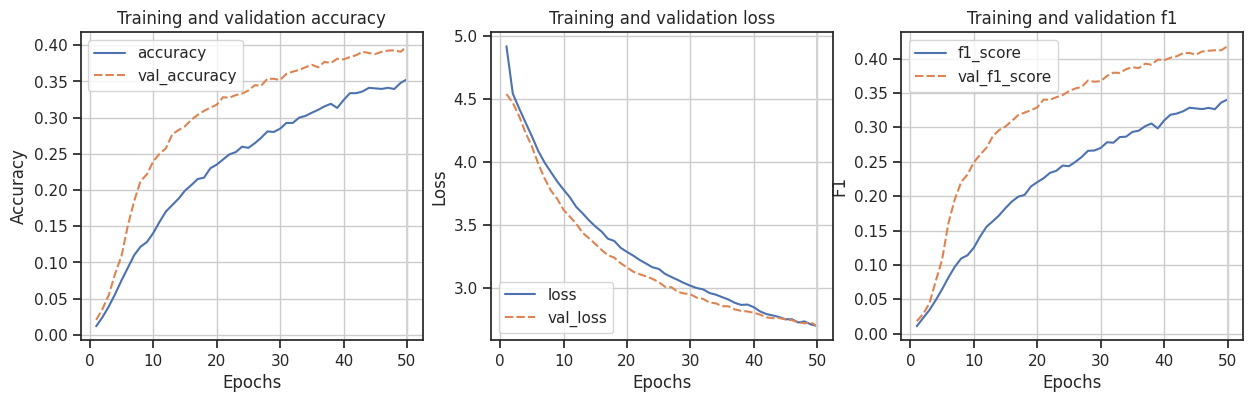

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, name), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/" + name + ".h5")
evaluate_model(loaded_model)

166/166 [==============================] - 33s 190ms/step - loss: 2.7372 - accuracy: 0.3833 - f1_score: 0.4040

Test loss: 2.737
Test accuracy: 0.383
Test f1: 0.404

Accuracy on test data: 38.33 %
F1-Score on test data: 40.40 %

              precision    recall  f1-score   support

     abhori1       0.35      0.32      0.33        50
     afecuc1       0.37      0.36      0.36        28
     afghor1       0.21      0.35      0.26        20
     afmdov1       0.17      0.53      0.26        15
     afpfly1       0.04      0.03      0.04        31
     afpwag1       0.24      0.42      0.30        24
     afrgos1       0.24      0.67      0.36        24
     afrthr1       0.39      0.63      0.48        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.45      0.23      0.31       166
     bawhor2       0.12      0.33      0.18        15
     bcbeat1       0.12      0.47      0.20        17
     beasun2       0.15      0.50      0.23        12
     bkctch1  

## Fine tuning

### Model 11 - 1 block

In [ ]:
fine_tuning = models.load_model(os.path.join(MODEL_FOLDER, 'MobileNet_model10.h5'))

setTrainable = False
for layer in fine_tuning.get_layer('base').layers:
    if layer.name in ('block_15_expand'):
        setTrainable = True
    if setTrainable == True:
        layer.trainable = True
    else:
      layer.trainable = False

model = compile_model(fine_tuning)
name = 'MobileNet_model11'

for i, layer in enumerate(fine_tuning.get_layer('base').layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

In [ ]:
fine_tuning.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 base (Functional)           (None, 7, 7, 160)         1364864   
                                                                 
 global_average_pooling2d (  (None, 160)               0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
history = run_model(model, name, audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 2.8841 - accuracy: 0.3079 - f1_score: 0.2967
Epoch 1: val_loss improved from inf to 3.09200, saving model to /content/drive/MyDrive/CIDL project/birds/model/MobileNet/MobileNet_model11.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2035s 6s/step - loss: 2.8841 - accuracy: 0.3079 - f1_score: 0.2967 - val_loss: 3.0920 - val_accuracy: 0.3018 - val_f1_score: 0.3285 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 2.5205 - accuracy: 0.3731 - f1_score: 0.3607
Epoch 2: val_loss did not improve from 3.09200
313/313 [==============================] - 101s 321ms/step - loss: 2.5205 - accuracy: 0.3731 - f1_score: 0.3607 - val_loss: 3.1929 - val_accuracy: 0.2677 - val_f1_score: 0.2991 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 2.3465 - accuracy: 0.4174 - f1_score: 0.4051
Epoch 3: val_loss did not improve from 3.09200
313/313 [==============================] - 140s 442ms/step - loss: 2.3481 - accuracy: 0.4170 - f1_score: 0.4047 - val_loss: 3.3283 - val_accuracy: 0.2515 - val_f1_score: 0.2789 - lr: 1.0000e-04
Epoch 4/50
312/313 [============================>.] - ETA: 0s - loss: 2.2165 - accuracy: 0.4500 

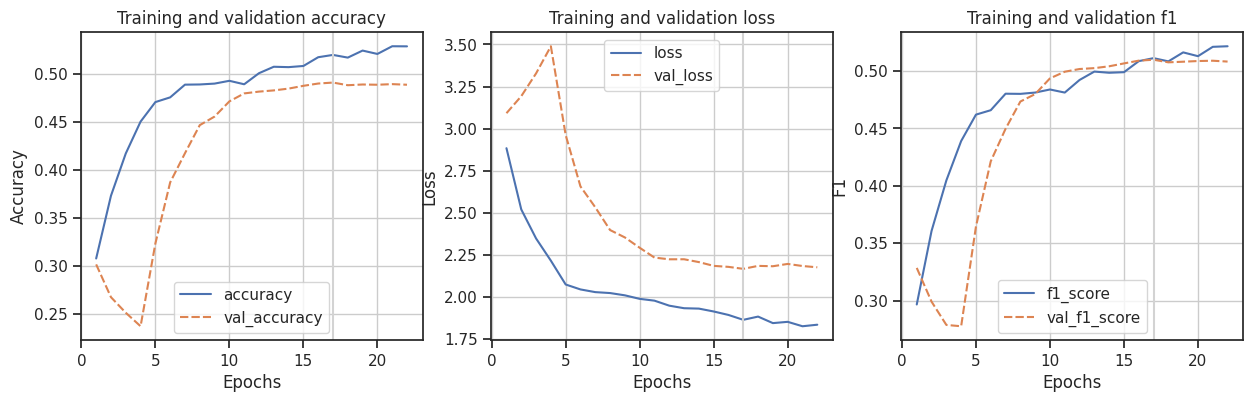

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, name), axis=0)

In [ ]:
model = load_model(MODEL_FOLDER + '/' + name + '.h5')
#model.summary()
evaluate_model(model)

166/166 [==============================] - 30s 175ms/step - loss: 2.2083 - accuracy: 0.4842 - f1_score: 0.5041

Test loss: 2.208
Test accuracy: 0.484
Test f1: 0.504

Accuracy on test data: 48.42 %
F1-Score on test data: 50.41 %

              precision    recall  f1-score   support

     abhori1       0.38      0.50      0.43        50
     afecuc1       0.43      0.57      0.49        28
     afghor1       0.39      0.55      0.46        20
     afmdov1       0.19      0.53      0.28        15
     afpfly1       0.11      0.13      0.12        31
     afpwag1       0.35      0.46      0.40        24
     afrgos1       0.32      0.75      0.45        24
     afrthr1       0.61      0.63      0.62        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.55      0.39      0.46       166
     bawhor2       0.24      0.47      0.32        15
     bcbeat1       0.23      0.53      0.32        17
     beasun2       0.16      0.50      0.24        12
     bkctch1  

#Remove block 15, 16

In [ ]:
def get_index_by_layer_name(model, layer_name):
  '''
  get_index_by_layer_name is used to retrieve the index of a specific layer
  :param model: model to check
  :param layer_name: name of the layer we want to get the index of
  :return: the index of the layer named as defined in layer_name
  '''
  for index, layer in enumerate(model.layers):
      if layer.name == layer_name:
          return index

In [ ]:
conv_base = tf.keras.applications.MobileNetV2(
    input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3),
    alpha=1,
    include_top= False,
    weights="imagenet",
)

In [ ]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
base = Model(conv_base.input, conv_base.layers[get_index_by_layer_name(conv_base, 'block_14_add')].output, name='base')
base.trainable = False
base.summary()

Model: "base"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']         

##Feature extraction

###Model 12 - model 3

In [ ]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = keras.applications.mobilenet.preprocess_input(inputs)
x = base(x)  #feat extr
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs, outputs)

name = 'MobileNet_model12'
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 base (Functional)           (None, 7, 7, 160)         1040704   
                                                                 
 global_average_pooling2d (  (None, 160)               0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
model = compile_model(model)

In [ ]:
history = run_model(model, name, audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
312/313 [============================>.] - ETA: 0s - loss: 4.3994 - accuracy: 0.0471 - f1_score: 0.0411
Epoch 1: val_loss improved from inf to 4.30143, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_model12.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 329s 1s/step - loss: 4.3991 - accuracy: 0.0471 - f1_score: 0.0411 - val_loss: 4.3014 - val_accuracy: 0.0793 - val_f1_score: 0.0771 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 4.2699 - accuracy: 0.0676 - f1_score: 0.0601
Epoch 2: val_loss improved from 4.30143 to 4.16361, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_model12.h5
313/313 [==============================] - 98s 312ms/step - loss: 4.2693 - accuracy: 0.0676 - f1_score: 0.0600 - val_loss: 4.1636 - val_accuracy: 0.1188 - val_f1_score: 0.1236 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 4.1598 - accuracy: 0.0843 - f1_score: 0.0740
Epoch 3: val_loss improved from 4.16361 to 4.03918, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_mod

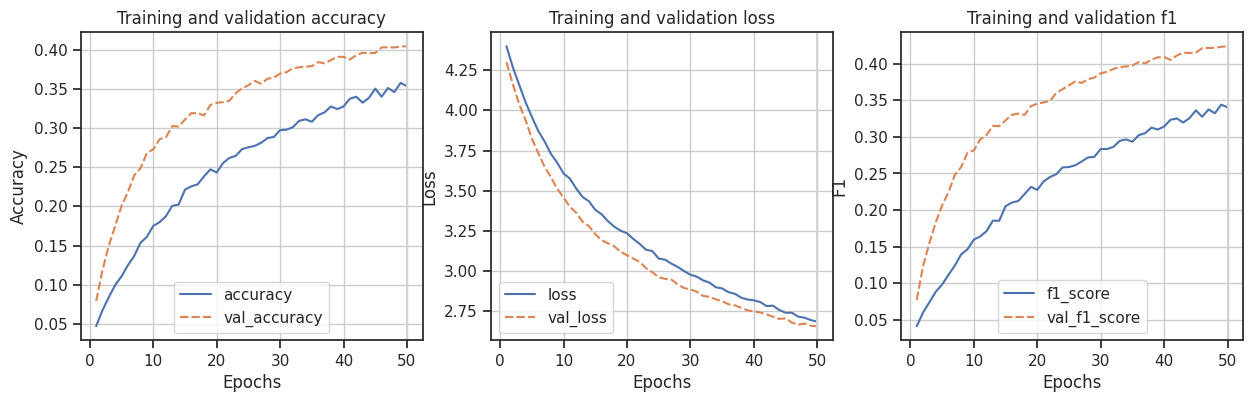

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, name), axis=0)

In [ ]:
loaded_model = load_model(MODEL_FOLDER + "/" + name + ".h5")
evaluate_model(loaded_model)

166/166 [==============================] - 31s 177ms/step - loss: 2.6933 - accuracy: 0.3946 - f1_score: 0.4140

Test loss: 2.693
Test accuracy: 0.395
Test f1: 0.414

Accuracy on test data: 39.46 %
F1-Score on test data: 41.40 %

              precision    recall  f1-score   support

     abhori1       0.21      0.24      0.22        50
     afecuc1       0.38      0.43      0.40        28
     afghor1       0.30      0.55      0.39        20
     afmdov1       0.18      0.53      0.27        15
     afpfly1       0.04      0.03      0.04        31
     afpwag1       0.27      0.54      0.36        24
     afrgos1       0.22      0.62      0.33        24
     afrthr1       0.38      0.60      0.47        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.58      0.20      0.30       166
     bawhor2       0.18      0.53      0.27        15
     bcbeat1       0.16      0.65      0.26        17
     beasun2       0.13      0.42      0.20        12
     bkctch1  

## Fine tuning

### Model 13 - 1 block

In [ ]:
fine_tuning = models.load_model(os.path.join(MODEL_FOLDER, 'MobileNet_model12.h5'))

setTrainable = False
for layer in fine_tuning.get_layer('base').layers:
    if layer.name in ('block_14_expand'):
        setTrainable = True
    if setTrainable == True:
        layer.trainable = True
    else:
      layer.trainable = False

model = compile_model(fine_tuning)
name = 'MobileNet_model13'

for i, layer in enumerate(fine_tuning.get_layer('base').layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

In [ ]:
fine_tuning.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 base (Functional)           (None, 7, 7, 160)         1040704   
                                                                 
 global_average_pooling2d (  (None, 160)               0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
history = run_model(model, name, audio_train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 2.4532 - accuracy: 0.3941 - f1_score: 0.3806
Epoch 1: val_loss improved from inf to 2.60885, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/MobileNet/MobileNet_model13.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 975s 3s/step - loss: 2.4532 - accuracy: 0.3941 - f1_score: 0.3806 - val_loss: 2.6088 - val_accuracy: 0.3890 - val_f1_score: 0.4130 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 2.2732 - accuracy: 0.4379 - f1_score: 0.4271
Epoch 2: val_loss did not improve from 2.60885
313/313 [==============================] - 92s 292ms/step - loss: 2.2735 - accuracy: 0.4379 - f1_score: 0.4271 - val_loss: 2.6318 - val_accuracy: 0.3879 - val_f1_score: 0.4120 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 2.1445 - accuracy: 0.4584 - f1_score: 0.4485
Epoch 3: val_loss did not improve from 2.60885
313/313 [==============================] - 90s 283ms/step - loss: 2.1445 - accuracy: 0.4584 - f1_score: 0.4485 - val_loss: 2.6293 - val_accuracy: 0.3921 - val_f1_score: 0.4191 - lr: 1.0000e-04
Epoch 4/50
312/313 [============================>.] - ETA: 0s - loss: 2.0178 - accuracy: 0.4872 - f

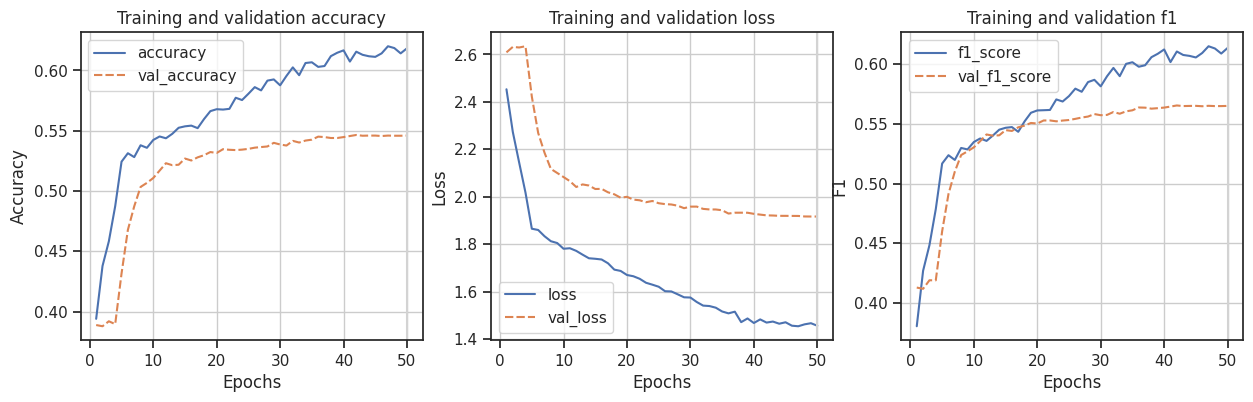

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, name), axis=0)

In [ ]:
model = load_model(MODEL_FOLDER + '/' + name + '.h5')
#model.summary()
evaluate_model(model)

166/166 [==============================] - 28s 161ms/step - loss: 1.9518 - accuracy: 0.5345 - f1_score: 0.5544

Test loss: 1.952
Test accuracy: 0.534
Test f1: 0.554

Accuracy on test data: 53.45 %
F1-Score on test data: 55.44 %

              precision    recall  f1-score   support

     abhori1       0.47      0.54      0.50        50
     afecuc1       0.54      0.68      0.60        28
     afghor1       0.42      0.70      0.53        20
     afmdov1       0.43      0.80      0.56        15
     afpfly1       0.12      0.16      0.14        31
     afpwag1       0.45      0.54      0.49        24
     afrgos1       0.38      0.67      0.48        24
     afrthr1       0.53      0.63      0.58        30
     amesun2       0.08      0.15      0.10        13
      barswa       0.64      0.41      0.50       166
     bawhor2       0.31      0.73      0.44        15
     bcbeat1       0.19      0.71      0.30        17
     beasun2       0.27      0.75      0.40        12
     bkctch1  